In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data and crate dataset
fake = pd.read_csv('../data/Fake.csv')
true = pd.read_csv('../data/True.csv')

# assign labels
fake['class'] = 1
true['class'] = 0

df = pd.concat([true,fake])

# top 5 rows
df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [3]:
df['full_text'] = df['title'] + '[SEP]' + df['text']
df.drop(['title', 'text', 'subject', 'date'], axis = 1, inplace = True)
df.head()

,class,full_text
0,0,"As U.S. budget fight looms, Republicans flip t..."
1,0,U.S. military to accept transgender recruits o...
2,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,FBI Russia probe helped by Australian diplomat...
4,0,Trump wants Postal Service to charge 'much mor...


In [4]:
sentences = np.array(df.full_text)
labels = np.array(df['class'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print('Train and Test set distribution: ', len(x_train), len(x_test), len(y_train), len(y_test))

Train and Test set distribution:  35918 8980 35918 8980


In [6]:
vocab_size = 100000
max_length = 5000
embedding_dim = 32
padding_type='post'
oov_token = '<OOV>'

In [7]:
# tokinizing the texts
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
#print(wored_index)

In [8]:
# pdding
train_sequences = tokenizer.texts_to_sequences(x_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type)

test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sentences = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type)

In [9]:
number_of_epochs = 10
lr = 0.0001

In [10]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 32)          3200000   
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,212,545
Trainable params: 3,212,545
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    metrics = ['accuracy']
)

In [13]:
# training
history = model.fit(padded_train_sequences, y_train, epochs = number_of_epochs, validation_data=(padded_test_sentences, y_test), verbose=1)

Epoch 1/10
1123/1123 [==============================] - 67s 59ms/step - loss: 0.6808 - accuracy: 0.5572 - val_loss: 0.6191 - val_accuracy: 0.7854
Epoch 2/10
1123/1123 [==============================] - 66s 59ms/step - loss: 0.3822 - accuracy: 0.9289 - val_loss: 0.2133 - val_accuracy: 0.9478
Epoch 3/10
1123/1123 [==============================] - 67s 60ms/step - loss: 0.1552 - accuracy: 0.9705 - val_loss: 0.1214 - val_accuracy: 0.9783
Epoch 4/10
1123/1123 [==============================] - 70s 62ms/step - loss: 0.0984 - accuracy: 0.9811 - val_loss: 0.1022 - val_accuracy: 0.9735
Epoch 5/10
1123/1123 [==============================] - 70s 62ms/step - loss: 0.0716 - accuracy: 0.9866 - val_loss: 0.0691 - val_accuracy: 0.9855
Epoch 6/10
1123/1123 [==============================] - 70s 62ms/step - loss: 0.0550 - accuracy: 0.9896 - val_loss: 0.0568 - val_accuracy: 0.9883
Epoch 7/10
1123/1123 [==============================] - 68s 61ms/step - loss: 0.0437 - accuracy: 0.9920 - val_loss: 0.0503 -

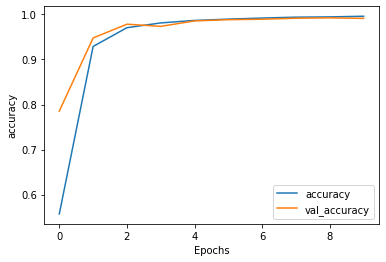

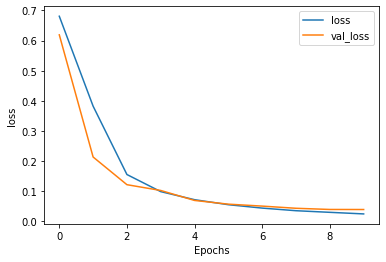

In [14]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")